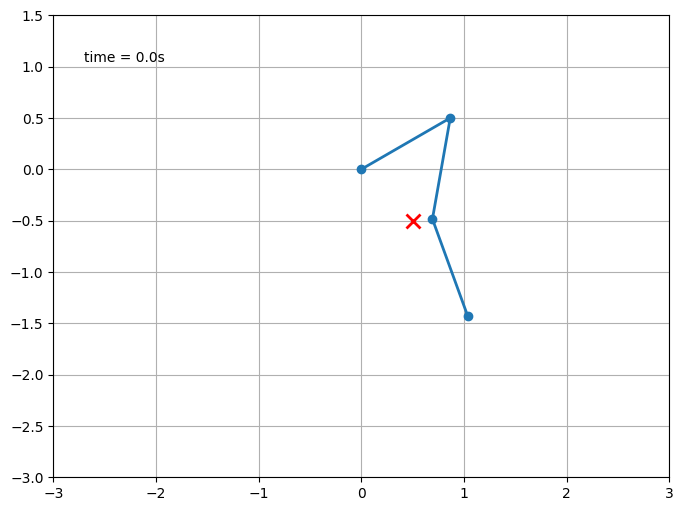

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin, cos
import matplotlib.animation as animation
from scipy.integrate import solve_ivp

G = 9.8  # acceleration due to gravity, in m/s^2
L1, L2, L3 = 1.0, 1.0, 1.0  # lengths of the pendulums in m
M1, M2, M3 = 1.0, 1.0, 1.0  # masses of the pendulums in kg

# Time parameters
t_stop = 2.5  # simulation time in seconds
dt = 0.01  # time step in seconds
t = np.arange(0, t_stop, dt)  # time array

# Initial conditions: theta1, omega1, theta2, omega2, theta3, omega3
th1, w1, th2, w2, th3, w3 = np.radians([120.0, 0.0, -10.0, 0.0, 20.0, 0.0])
initial_state = [th1, w1, th2, w2, th3, w3]

def derivs(t, state):
    dydx = np.zeros_like(state)

    theta1, omega1, theta2, omega2, theta3, omega3 = state
    delta1 = theta2 - theta1
    delta2 = theta3 - theta2

    dydx[0] = omega1
    dydx[2] = omega2
    dydx[4] = omega3

    denom1 = (M1 + M2) * L1 - M2 * L1 * cos(delta1) ** 2
    dydx[1] = ((M2 * L1 * omega1 ** 2 * sin(delta1) * cos(delta1)
                + M2 * G * sin(theta2) * cos(delta1)
                + M2 * L2 * omega2 ** 2 * sin(delta1)
                - (M1 + M2) * G * sin(theta1)) / denom1)

    denom2 = (L2 / L1) * denom1
    dydx[3] = ((-M2 * L2 * omega2 ** 2 * sin(delta1) * cos(delta1)
                + (M1 + M2) * G * sin(theta1) * cos(delta1)
                - (M1 + M2) * L1 * omega1 ** 2 * sin(delta1)
                - (M1 + M2) * G * sin(theta2)) / denom2)

    denom3 = (L3 / L2) * ((M2 + M3) * L2 - M3 * L2 * cos(delta2) ** 2)
    dydx[5] = ((M3 * L2 * omega2 ** 2 * sin(delta2) * cos(delta2)
                + M3 * G * sin(theta3) * cos(delta2)
                + M3 * L3 * omega3 ** 2 * sin(delta2)
                - (M2 + M3) * G * sin(theta2)) / denom3)

    return dydx

# Solve the ODE
sol = solve_ivp(derivs, [0, t_stop], initial_state, t_eval=t, method='RK45')
y = sol.y.T

# Convert the angles to Cartesian coordinates
x1 = L1 * sin(y[:, 0])
y1 = -L1 * cos(y[:, 0])

x2 = L2 * sin(y[:, 2]) + x1
y2 = -L2 * cos(y[:, 2]) + y1

x3 = L3 * sin(y[:, 4]) + x2
y3 = -L3 * cos(y[:, 4]) + y2

# Target point coordinates
target_x, target_y = 0.5, -0.5

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(autoscale_on=False, xlim=(-L1-L2-L3, L1+L2+L3), ylim=(-L1-L2-L3, 1.5))
ax.set_aspect('equal')
ax.grid()

# Plot the target point with a cross
ax.plot(target_x, target_y, 'rx', ms=10, mew=2)

line, = ax.plot([], [], 'o-', lw=2)
trace, = ax.plot([], [], '.-', lw=1, ms=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def animate(i):
    thisx = [0, x1[i], x2[i], x3[i]]
    thisy = [0, y1[i], y2[i], y3[i]]

    history_x = x3[:i]
    history_y = y3[:i]

    line.set_data(thisx, thisy)
    trace.set_data(history_x, history_y)
    time_text.set_text(time_template % (i * dt))
    return line, trace, time_text

ani = animation.FuncAnimation(
    fig, animate, len(y), interval=dt * 1000, blit=True)

plt.show()